In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Tune the necessary hyperparameters by for instance grid search. In this exercise we are concerned with the hyperparameters given in Table 2. Every hyperparameter should be tested for at least 3 values but you are free to add more testings. There is a desginated validation set that can be used for the
validation of the hyperparameters dist_val.csv.

In [53]:
train_data = pd.read_csv('../A3_datasets/dist.csv', delimiter=';', header=None).to_numpy()
test_data = pd.read_csv('../A3_datasets/dist_val.csv', delimiter=';', header=None).to_numpy()

In [54]:
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [55]:
param_grid_linear = {'C': [0.1, 1, 10]}
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
param_grid_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}

In [56]:
svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')
svc_poly = SVC(kernel='poly')

In [57]:
cv = 5
linear_grid = GridSearchCV(svc_linear, param_grid_linear, cv=cv)
rbf_grid = GridSearchCV(svc_rbf, param_grid_rbf, cv=cv)
poly_grid = GridSearchCV(svc_poly, param_grid_poly, cv=cv)

In [58]:
linear_grid.fit(X_train, y_train)
rbf_grid.fit(X_train, y_train)
poly_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4]})

In [59]:
linear_test_preds = linear_grid.predict(X_test)
rbf_test_preds = rbf_grid.predict(X_test)
poly_test_preds = poly_grid.predict(X_test)

In [60]:
# Compute the test set error for each SVM
linear_test_acc = np.sum(linear_test_preds == y_test) / len(y_test) * 100
rbf_test_acc = np.sum(rbf_test_preds == y_test) / len(y_test) * 100
poly_test_acc = np.sum(poly_test_preds == y_test) / len(y_test) * 100

In [61]:
print('Best linear SVM hyperparameters: {}'.format(linear_grid.best_params_))
print('Best RBF SVM hyperparameters: {}'.format(rbf_grid.best_params_))
print('Best poly SVM hyperparameters: {}'.format(poly_grid.best_params_))
print('\n')
print('Linear SVM validation accuracy: {:.2f}%'.format(linear_test_acc))
print('RBF SVM validation accuracy: {:.2f}%'.format(rbf_test_acc))
print('Poly SVM validation accuracy: {:.2f}%'.format(poly_test_acc))


Best linear SVM hyperparameters: {'C': 0.1}
Best RBF SVM hyperparameters: {'C': 0.1, 'gamma': 0.1}
Best poly SVM hyperparameters: {'C': 1, 'degree': 3}


Linear SVM validation accuracy: 88.34%
RBF SVM validation accuracy: 90.12%
Poly SVM validation accuracy: 90.78%


2. For each kernel, produce a plot of the decision boundary for the best models together with the data.

In [62]:
svm_linear = linear_grid.best_estimator_
svm_rbf = rbf_grid.best_estimator_
svm_poly = poly_grid.best_estimator_

In [63]:
def plot_decision_boundary(clf, X, y, title, subplot_index):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, subplot_index)
    plt.contour(xx, yy, Z)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

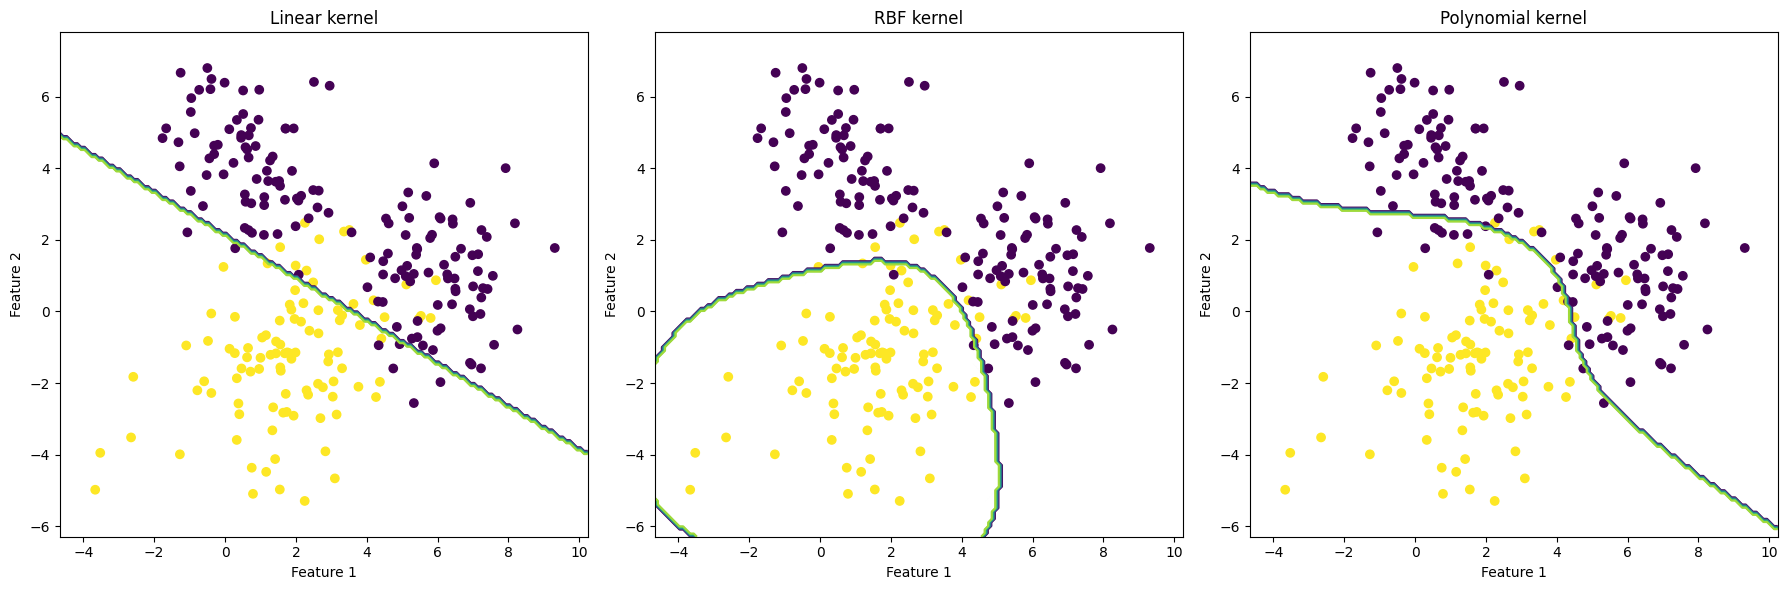

In [64]:
# Create a figure with 1 row and 3 columns
plt.figure(figsize=(18, 6))

# Plot the decision boundary for each SVM classifier
plt.subplot(1, 3, 1)
plot_decision_boundary(svm_linear, X_train, y_train, 'Linear kernel', 1)

plt.subplot(1, 3, 2)
plot_decision_boundary(svm_rbf, X_train, y_train, 'RBF kernel', 2)

plt.subplot(1, 3, 3)
plot_decision_boundary(svm_poly, X_train, y_train, 'Polynomial kernel', 3)

plt.tight_layout()
plt.show()